In [1]:
import sys
sys.path.append("../src/")
from wiroobs import WIROObs
from image_utils import assemble_fullpath, assemble_filename
from pathlib import Path
from plot_utils import plot_zscale_image, show_imstat
import matplotlib.pyplot as plt

In [2]:
import fitsio

In [3]:
wiro = WIROObs()

In [4]:
input_dir = "/global/cfs/cdirs/desi/users/adamyers/wiro/raw/20221121"
output_dir = "/global/cfs/cdirs/desi/users/adamyers/wiro/reduced/20221121"
bias = assemble_filename("a{:>03d}.fit", "27-36,51-60")
        # + assemble_filename("a{:>03d}.fit", "112-116")
flat_filters = {}
# flats = assemble_filename("a{:>03d}.fit", "23-47")
# # flats = [f"a{i:>03d}.fit" for i in (1, 2, 4, 5, 8, 9, 10)]
# for img in assemble_fullpath(input_dir, flats):
#     header = fitsio.read_header(img)
#     # filter name is the string after column
#     # Filter 5: i' 54605
#     fitlername = header["FILTER"].rsplit(":")[-1].strip()
#     if fitlername not in list(flat_filters.keys()):
#         flat_filters[fitlername] = []
#     flat_filters[fitlername].append(img.name)

In [5]:
sci_filters = {}
science = assemble_filename("a{:>03d}.fit", "40-50")
            # + assemble_filename("")
for img in assemble_fullpath(input_dir, science):
    header = fitsio.read_header(img)
    # filter name is the string after column
    # Filter 5: i' 54605
    fitlername = header["FILTER"].rsplit(":")[-1].strip()
    if fitlername not in list(sci_filters.keys()):
        sci_filters[fitlername] = []
    sci_filters[fitlername].append(img.name)

In [6]:
output_path = Path(output_dir)
if not output_path.exists():
    output_path.mkdir()

In [7]:
# dark = [f"d{i:>03d}.fit" for i in range(1, 4)] \
#         + [f"a{i:>03d}.fit" for i in (106, 114, 124, 129, 130, 135)]
dark = []

In [8]:
wiro.from_lists(sci_dict=sci_filters, flat_dict=flat_filters, dark_filelist=dark,
                bias_filelist=bias, input_dir=input_dir, output_dir=output_dir)


In [9]:
wiro.remove_bad_images()

In [10]:
print(wiro)

All images: 
{ 'bad_images': [],
  'bias': [ 'a027.fit', 'a028.fit', 'a029.fit', 'a030.fit', 'a031.fit',
            'a032.fit', 'a033.fit', 'a034.fit', 'a035.fit', 'a036.fit',
            'a051.fit', 'a052.fit', 'a053.fit', 'a054.fit', 'a055.fit',
            'a056.fit', 'a057.fit', 'a058.fit', 'a059.fit', 'a060.fit'],
  'dark': [],
  'sci_C 14859': ['a040.fit', 'a041.fit', 'a042.fit', 'a043.fit', 'a044.fit'],
  'sci_D 27981': [ 'a045.fit', 'a046.fit', 'a047.fit', 'a048.fit', 'a049.fit',
                   'a050.fit']}
Science filters: ['C 14859', 'D 27981']
Flat filters: []
Processing steps: 
Done overscan: False
Done bias: False
Done dark: False
Done flat: False
Input directory: /global/cfs/cdirs/desi/users/adamyers/wiro/raw/20221121
Output directory: /global/cfs/cdirs/desi/users/adamyers/wiro/reduced/20221121


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
# wiro.redo_zt = True
wiro.overscan_sub_trim()

In [13]:
wiro.done_overscan = True

In [14]:
wiro.bias_sub()

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: splitting each image into 43 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the uni

In [15]:
wiro.done_bias = True
wiro.done_overscan = True

In [16]:
dir_masterflat = Path("/global/cfs/cdirs/desi/users/adamyers/wiro/masterflats/nov-run")
master_flats = {
    'C 14859': dir_masterflat / "masterflat_C 14859_clip_med_weighted_count.fits",
    'D 27981': dir_masterflat / "masterflat_D 27981_clip_med_weighted_count.fits"
}

In [17]:
# wiro.redo_flat = True
wiro.flat_div(master_flats=master_flats)

In [18]:
print(wiro)

All images: 
{ 'bad_images': [],
  'bias': [ 'a027.fit', 'a028.fit', 'a029.fit', 'a030.fit', 'a031.fit',
            'a032.fit', 'a033.fit', 'a034.fit', 'a035.fit', 'a036.fit',
            'a051.fit', 'a052.fit', 'a053.fit', 'a054.fit', 'a055.fit',
            'a056.fit', 'a057.fit', 'a058.fit', 'a059.fit', 'a060.fit'],
  'dark': [],
  'sci_C 14859': ['a040.fit', 'a041.fit', 'a042.fit', 'a043.fit', 'a044.fit'],
  'sci_D 27981': [ 'a045.fit', 'a046.fit', 'a047.fit', 'a048.fit', 'a049.fit',
                   'a050.fit']}
Science filters: ['C 14859', 'D 27981']
Flat filters: []
Processing steps: 
Done overscan: True
Done bias: True
Done dark: False
Done flat: True
Input directory: /global/cfs/cdirs/desi/users/adamyers/wiro/raw/20221121
Output directory: /global/cfs/cdirs/desi/users/adamyers/wiro/reduced/20221121


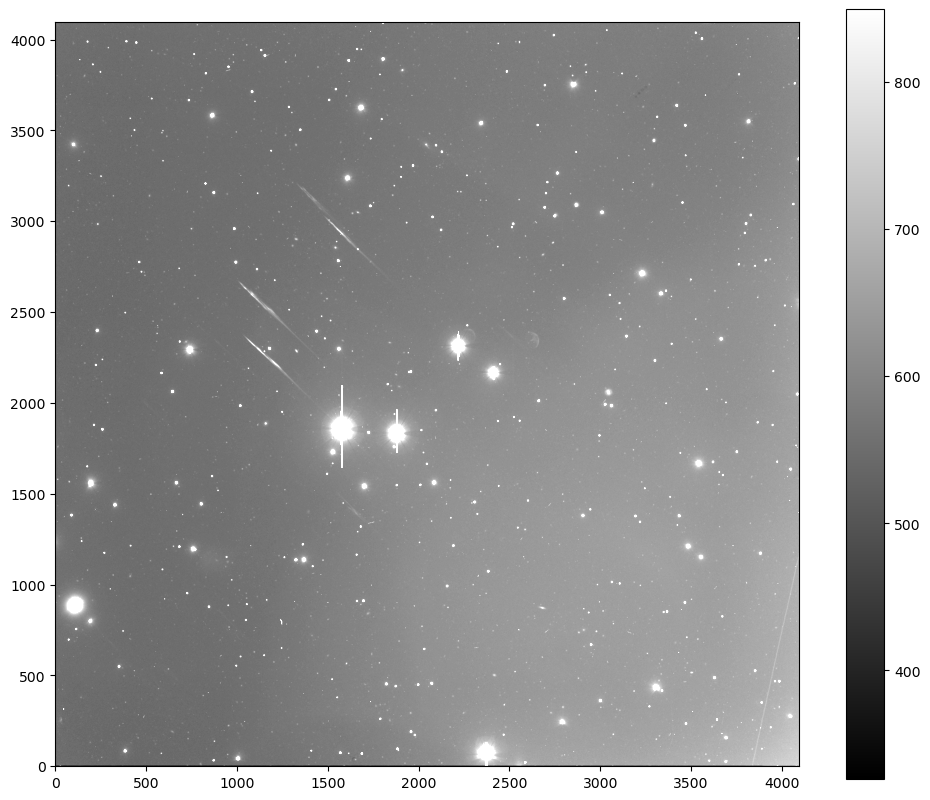

In [19]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, wiro.images_dict["sci_C 14859"][-2],'zbf'))
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")

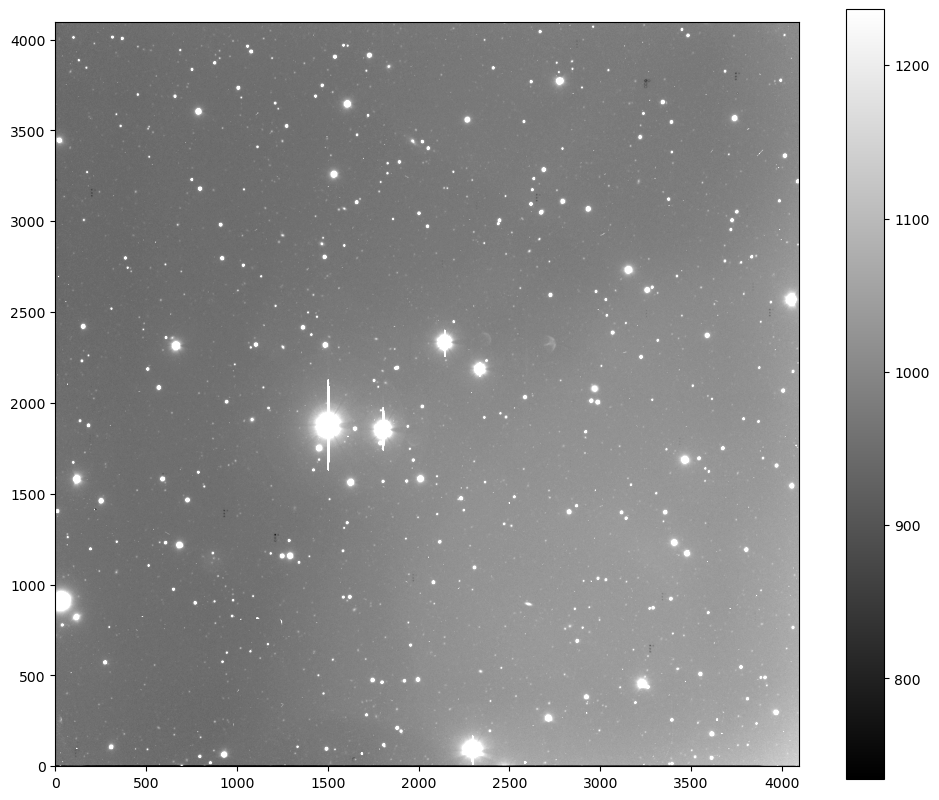

In [20]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, wiro.images_dict["sci_D 27981"][-1],'zbf'))
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")

In [ ]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, "masterflat_C 14859_clip_med_weighted_count.fits"))

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")

In [ ]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, "masterflat_D 27981_clip_med_weighted_count.fits"))

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")

In [ ]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, "masterflat_g 1736_clip_med_weighted_count.fits"))

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")

In [ ]:
import numpy as np

In [ ]:
np.max(imdata)

In [ ]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, "a002_z.fit"))

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")

In [ ]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, "a025_zb.fit"))
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")
show_imstat(imdata)

In [ ]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, "a035_zb.fit"))
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")
show_imstat(imdata)

In [ ]:
from astropy.stats import sigma_clip, mad_std

In [ ]:
imdata = fitsio.read(assemble_fullpath(wiro.output_dir, "a045_zb.fit"))
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
filt_imdata = sigma_clip(imdata, sigma_lower=5, sigma_upper=5, cenfunc="median", stdfunc=mad_std)
filt_imdata.data[filt_imdata.mask] = 0
filt_imdata.fill_value = -1e10
vmin, vmax = plot_zscale_image(imdata, ax[0], cmap="gray")
plot_zscale_image(filt_imdata, ax[1], cmap='gray', vmax=vmax, vmin=vmin)
show_imstat(imdata)

In [ ]:
filt_imdata.data[filt_imdata.mask] = 0

In [ ]:
filt_imdata.fill_value = 0

In [ ]:
filt_imdata

In [ ]:
filt_imdata.data[filt_imdata.mask]

In [ ]:
filt_imdata

In [30]:
path_master = Path('/global/homes/b/brookluo/wiro-data/reduced/coadd-images', 'A-5-XMM-combined.fits')

In [31]:
imdata = fitsio.read(path_master)

In [48]:
from astropy.visualization import ZScaleInterval

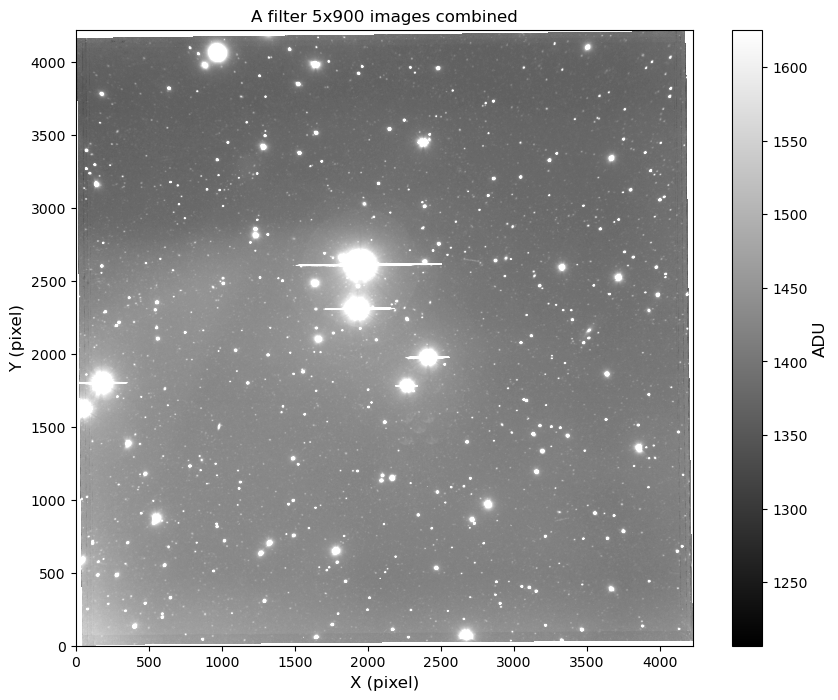

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(imdata)
# vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")
cmap = 'gray'
im = ax.imshow(imdata, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('ADU',fontsize=12)
plt.xlabel("X (pixel)",fontsize=12)
plt.ylabel("Y (pixel)",fontsize=12)
plt.title("A filter 5x900 images combined")
# fig.colorbar("gray").set_title('ADU',fontsize=8)
plt.savefig("A5-combined.png")

In [41]:
fig = ax.get_figure()

In [43]:
plt.colorbar()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 640x480 with 0 Axes>